In [1]:
import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet('train_seg3.parquet')
oos = pd.read_parquet('oos_seg3.parquet')
oot = pd.read_parquet('oot_seg3.parquet')

In [3]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)

Binning 

Skip FLAG_DEPOSIT: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[F],65718,0.487888,37308,28410,0.432302,0.001524,0.000001,1.417144e-07
1,"[M, O]",68981,0.512112,39110,29871,0.433032,-0.001452,0.000001,1.349839e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.000002,2.766983e-07


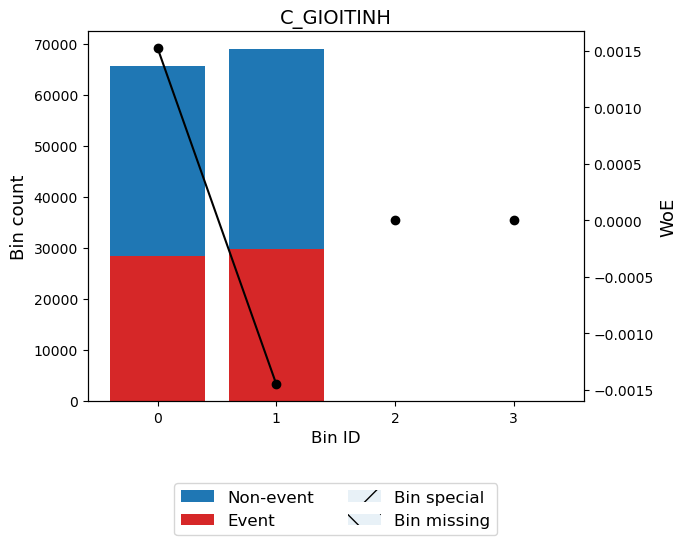


Processing: TRINHDO
   -> STATUS: OPTIMAL
   -> IV: 0.0298
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[4.0, 3.0]",20248,0.150320,12660,7588,0.374753,0.240937,0.008546,0.001066
1,"[2.0, nan]",68331,0.507287,40176,28155,0.412038,0.084603,0.003608,0.000451
2,[1.0],46120,0.342393,23582,22538,0.488682,-0.225661,0.017629,0.002199
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.029783,0.003716


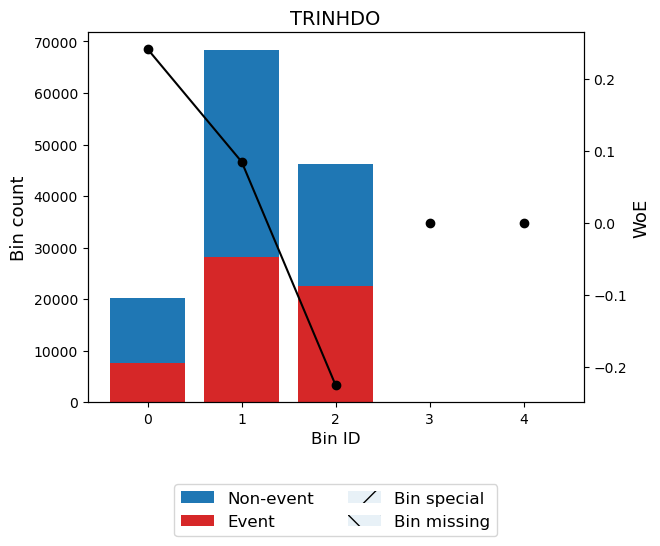


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0402
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],47317,0.35128,29989,17328,0.366211,0.277565,0.026401,0.003290
1,[Single],87382,0.64872,46429,40953,0.468666,-0.145443,0.013834,0.001728
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.00000,76418,58281,0.432676,,0.040235,0.005017


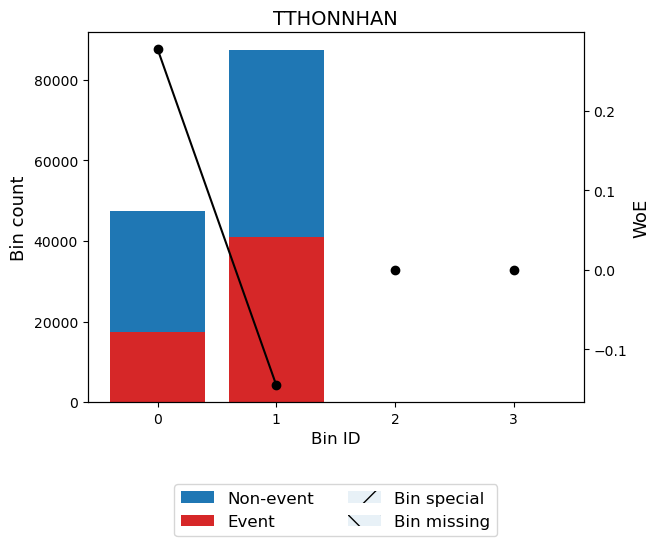


Processing: SOHUUNHA
   -> STATUS: OPTIMAL
   -> IV: 1.3078
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",94363,0.700547,38882,55481,0.587953,-0.626451,0.277612,0.034145
1,"[0.50, inf)",40336,0.299453,37536,2800,0.069417,2.324739,1.030208,0.105881
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,1.307820,0.140026


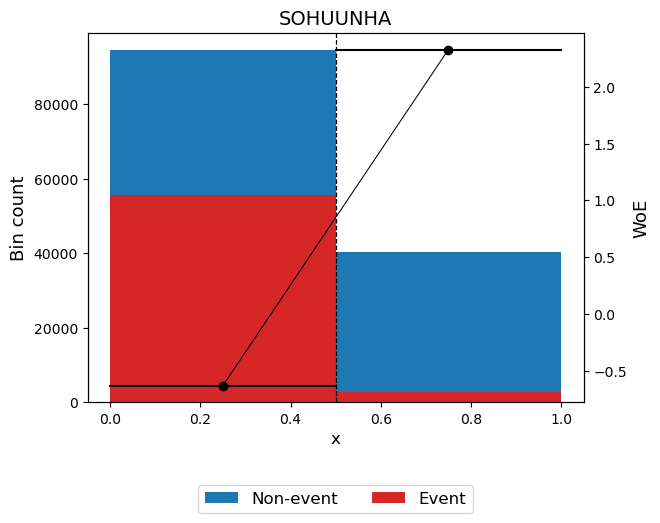


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",134699,1.0,76418,58281,0.432676,-0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,134699,1.0,76418,58281,0.432676,,0.0,0.0


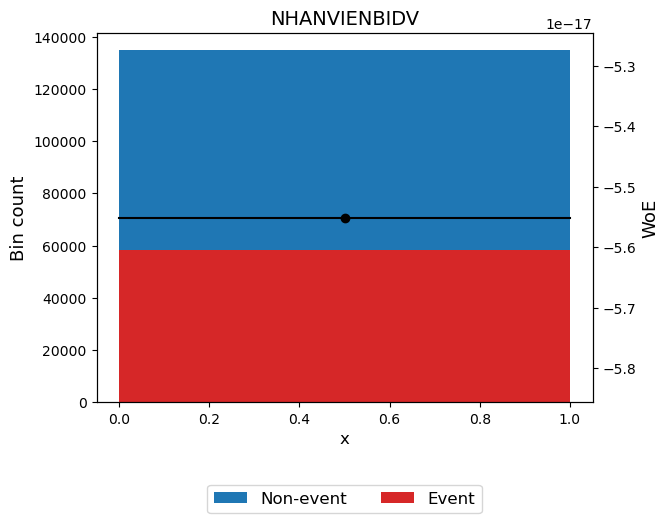


Processing: BASE_AUM
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[4, 0](0..1), coeff=4234, offset=0), IntAffine(expr=x[4, 1](0..1), coeff=1889, offset=0), IntAffine(expr=x[4, 2](0..1), coeff=94, offset=0), IntAffine(expr=x[4, 3](0..1), coeff=135, offset=0)), IntConstant(0)

Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.1699
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 24.50)",21671,0.160885,8532,13139,0.606294,-0.702703,0.079963,9.794649e-03
1,"[24.50, 29.50)",22055,0.163735,10936,11119,0.504149,-0.287537,0.013708,1.707662e-03
2,"[29.50, 35.50)",32334,0.240046,18313,14021,0.433630,-0.003887,0.000004,4.535025e-07
3,"[35.50, 43.50)",37043,0.275006,23295,13748,0.371136,0.256403,0.017678,2.203680e-03
4,"[43.50, inf)",21596,0.160328,15342,6254,0.289591,0.626431,0.058544,7.200650e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.169897,2.090710e-02


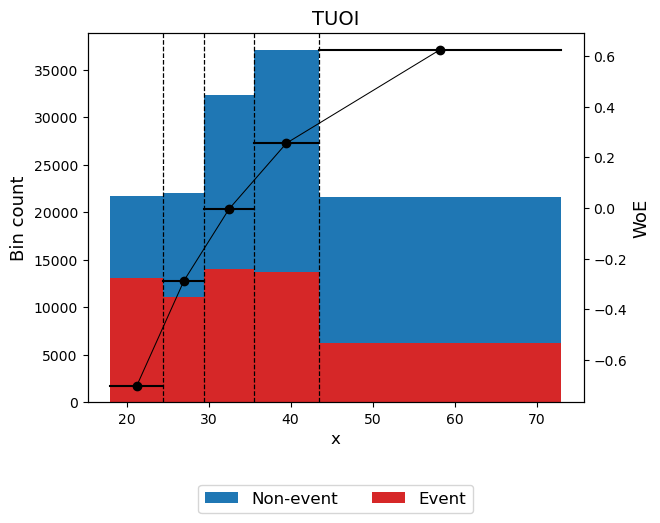


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0299
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 14519619.00)",17050,0.126579,8329,8721,0.511496,-0.316933,0.012882,0.001603
1,"[14519619.00, 19228950.00)",40795,0.302860,22154,18641,0.456943,-0.098288,0.002943,0.000368
2,"[19228950.00, 21057930.00)",16118,0.119659,9180,6938,0.430450,0.009072,0.000010,0.000001
3,"[21057930.00, 24620919.00)",25275,0.187641,15015,10260,0.405935,0.109855,0.002246,0.000281
4,"[24620919.00, inf)",28775,0.213624,17968,10807,0.375569,0.237456,0.011801,0.001472
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,6686,0.049637,3772,2914,0.435836,-0.012863,0.000008,0.000001
Totals,,134699,1.000000,76418,58281,0.432676,,0.029889,0.003726


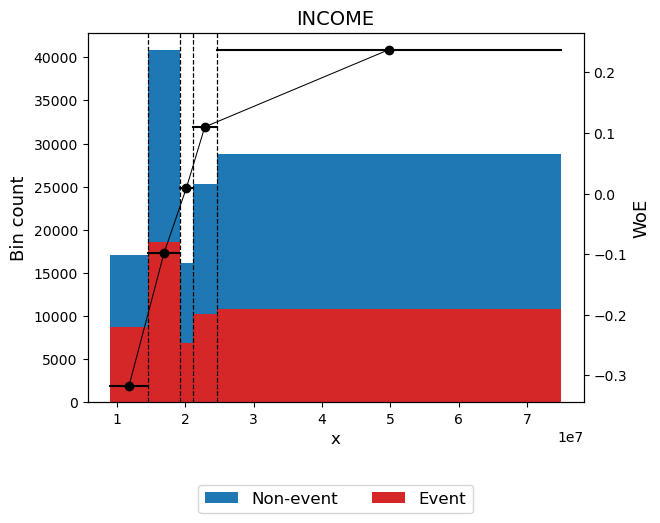


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.0567
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 310412064.00)",14594,0.108345,9185,5409,0.370632,0.258565,0.007081,0.000883
1,"[310412064.00, 452025392.00)",46492,0.345155,28490,18002,0.387206,0.188128,0.012028,0.001501
2,"[452025392.00, 546174720.00)",27454,0.203817,16043,11411,0.415641,0.069753,0.000987,0.000123
3,"[546174720.00, 709589216.00)",24610,0.182704,12759,11851,0.481552,-0.197117,0.007171,0.000895
4,"[709589216.00, inf)",21549,0.159979,9941,11608,0.538679,-0.425969,0.029428,0.003651
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.056695,0.007053


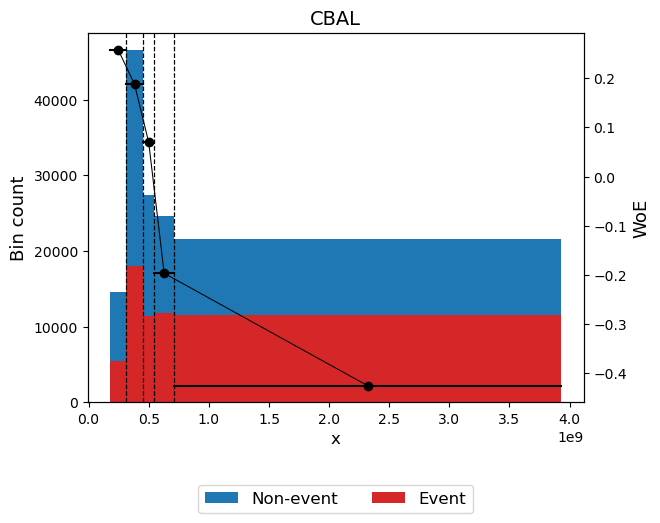


Processing: CBALORG
   -> STATUS: OPTIMAL
   -> IV: 0.0542
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 459199392.00)",49507,0.367538,30663,18844,0.380633,0.21592,0.016825,0.002099
1,"[459199392.00, 558862336.00)",29175,0.216594,17322,11853,0.406272,0.108454,0.002527,0.000316
2,"[558862336.00, 626784096.00)",14645,0.108724,8248,6397,0.436804,-0.016801,0.000031,0.000004
3,"[626784096.00, 863765600.00)",25761,0.191249,13065,12696,0.492838,-0.242292,0.011357,0.001416
4,"[863765600.00, inf)",15611,0.115895,7120,8491,0.543911,-0.447041,0.023478,0.002911
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.054218,0.006745


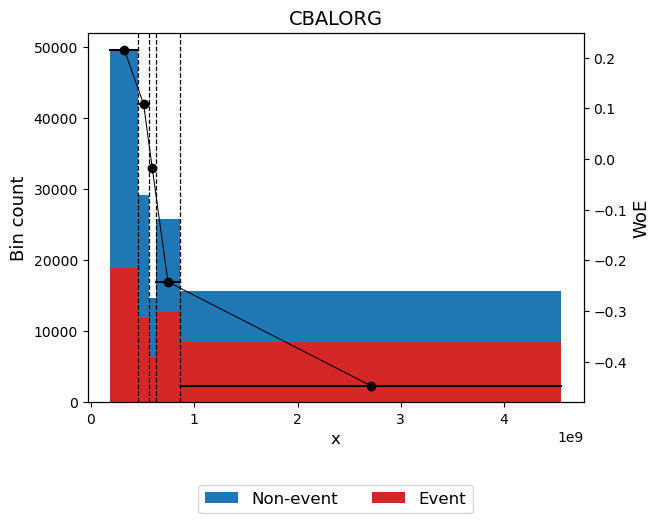


Processing: AFLIMT_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0247
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 668368224.00)",66642,0.494748,39658,26984,0.404910,0.114106,0.006386,0.000798
1,"[668368224.00, 752937632.00)",17406,0.129221,10132,7274,0.417902,0.06045,0.000470,0.000059
2,"[752937632.00, 917382144.00)",22211,0.164894,12535,9676,0.435640,-0.012066,0.000024,0.000003
3,"[917382144.00, inf)",28440,0.211137,14093,14347,0.504466,-0.288805,0.017834,0.002221
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.024714,0.003081


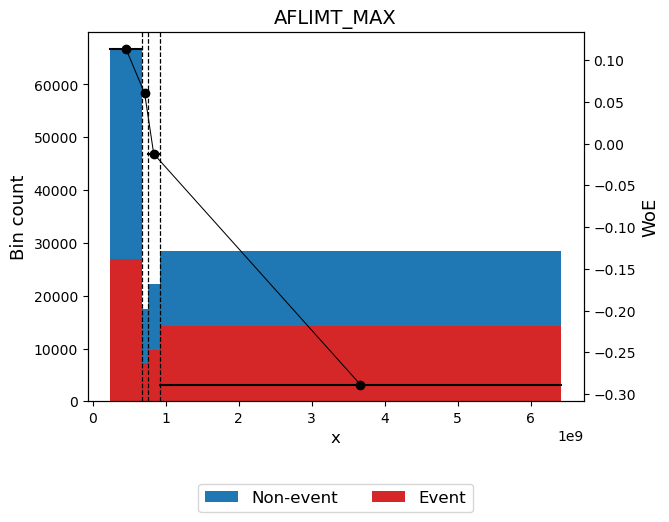


Processing: AFLIMT_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0247
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 601531392.00)",66642,0.494748,39658,26984,0.404910,0.114106,0.006386,0.000798
1,"[601531392.00, 677643872.00)",17406,0.129221,10132,7274,0.417902,0.06045,0.000470,0.000059
2,"[677643872.00, 825643904.00)",22211,0.164894,12535,9676,0.435640,-0.012066,0.000024,0.000003
3,"[825643904.00, inf)",28440,0.211137,14093,14347,0.504466,-0.288805,0.017834,0.002221
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.024714,0.003081


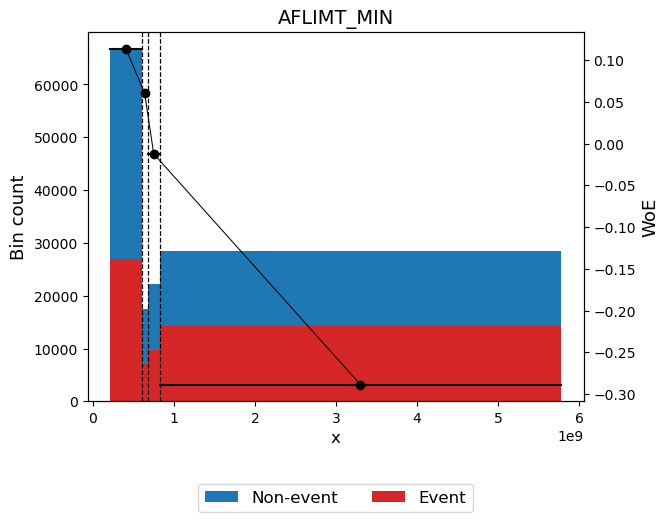


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0247
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 634949824.00)",66642,0.494748,39658,26984,0.404910,0.114106,0.006386,0.000798
1,"[634949824.00, 715290752.00)",17406,0.129221,10132,7274,0.417902,0.06045,0.000470,0.000059
2,"[715290752.00, 871513024.00)",22211,0.164894,12535,9676,0.435640,-0.012066,0.000024,0.000003
3,"[871513024.00, inf)",28440,0.211137,14093,14347,0.504466,-0.288805,0.017834,0.002221
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.024714,0.003081


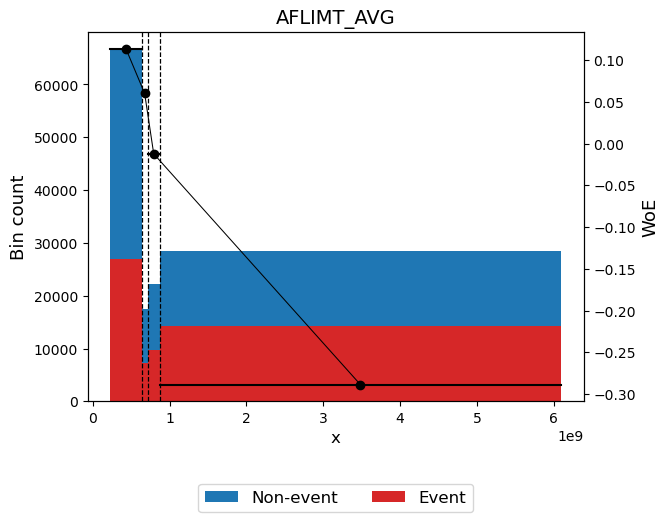


Processing: CBAL_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0500
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 374113776.00)",36295,0.269453,22539,13756,0.379005,0.22283,1.312796e-02,1.637608e-03
1,"[374113776.00, 468220208.00)",30892,0.229341,18635,12257,0.396769,0.148002,4.965101e-03,6.200718e-04
2,"[468220208.00, 572558688.00)",25898,0.192266,14700,11198,0.432389,0.00117,2.632492e-07,3.290615e-08
3,"[572558688.00, 737749312.00)",21861,0.162295,11410,10451,0.478066,-0.18315,5.496413e-03,6.860930e-04
4,"[737749312.00, inf)",19753,0.146645,9134,10619,0.537589,-0.421583,2.642343e-02,3.278684e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,5.001316e-02,6.222490e-03


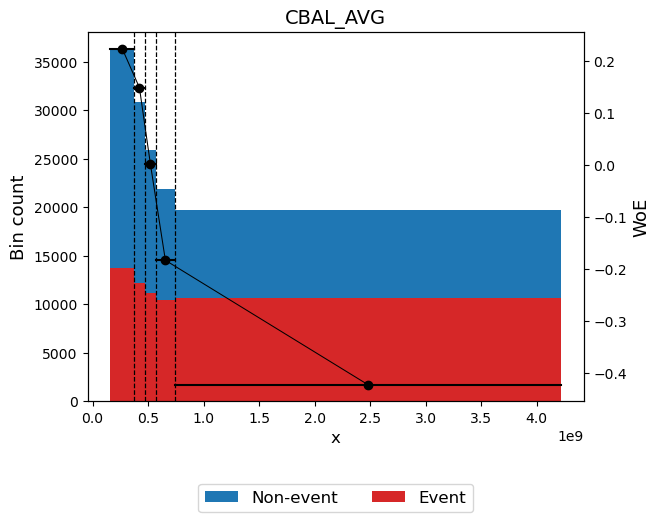


Processing: CBAL_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0502
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 459111968.00)",38831,0.288280,24085,14746,0.379748,0.219675,1.365477e-02,1.703422e-03
1,"[459111968.00, 561864224.00)",28160,0.209059,16984,11176,0.396875,0.147561,4.499236e-03,5.618949e-04
2,"[561864224.00, 688335328.00)",26177,0.194337,14854,11323,0.432555,0.000491,4.685001e-08,5.856251e-09
3,"[688335328.00, 861114176.00)",20026,0.148672,10503,9523,0.475532,-0.172991,4.490258e-03,5.605834e-04
4,"[861114176.00, inf)",21505,0.159652,9992,11513,0.535364,-0.412634,2.755918e-02,3.420664e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,5.020349e-02,6.246570e-03


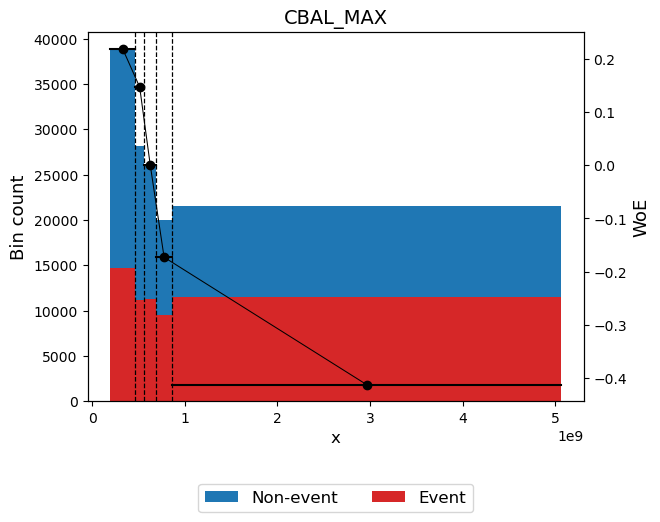


Processing: CBAL_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0500
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 299291024.00)",36295,0.269453,22539,13756,0.379005,0.22283,1.312796e-02,1.637608e-03
1,"[299291024.00, 374576160.00)",30892,0.229341,18635,12257,0.396769,0.148002,4.965101e-03,6.200718e-04
2,"[374576160.00, 458046944.00)",25898,0.192266,14700,11198,0.432389,0.00117,2.632492e-07,3.290615e-08
3,"[458046944.00, 590199456.00)",21861,0.162295,11410,10451,0.478066,-0.18315,5.496413e-03,6.860930e-04
4,"[590199456.00, inf)",19753,0.146645,9134,10619,0.537589,-0.421583,2.642343e-02,3.278684e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,5.001316e-02,6.222490e-03


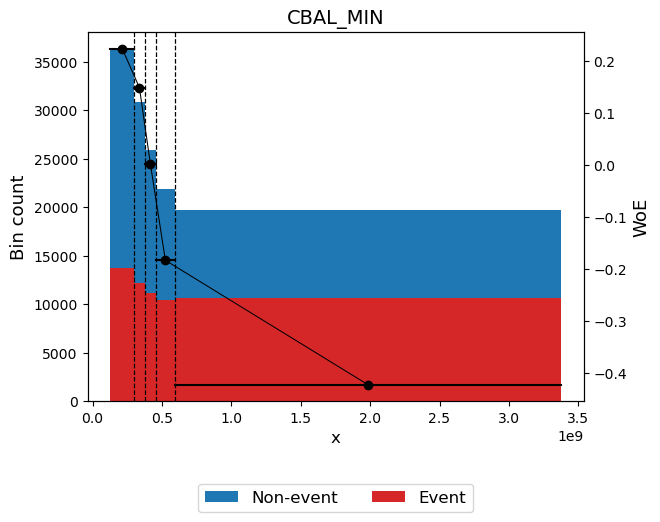


Processing: COLLATERAL_VALUE
   -> STATUS: OPTIMAL
   -> IV: 1.3093
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1296444.50)",18780,0.139422,7374,11406,0.607348,-0.707121,0.070155,0.008591
1,"[1296444.50, 2000096640.00)",47380,0.351747,19840,27540,0.581258,-0.598882,0.127510,0.015705
2,"[2000096640.00, inf)",40331,0.299416,37533,2798,0.069376,2.325374,1.030478,0.105899
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,28208,0.209415,11671,16537,0.586252,-0.619435,0.081159,0.009986
Totals,,134699,1.000000,76418,58281,0.432676,,1.309301,0.140181


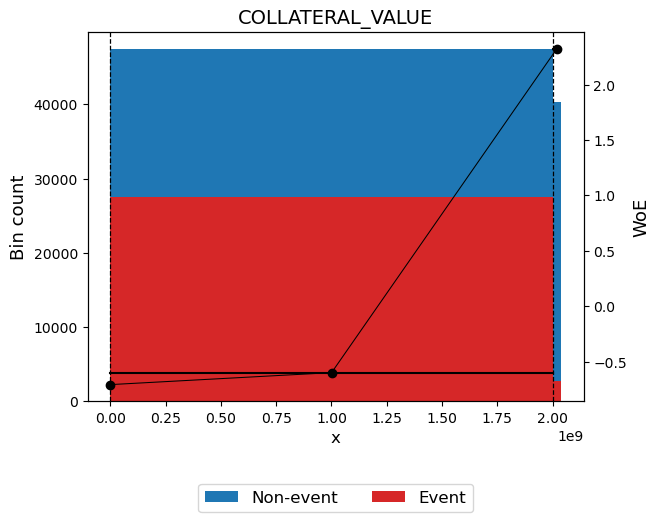


Processing: LTV
   -> STATUS: OPTIMAL
   -> IV: 1.5322
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 24.94)",21254,0.157789,20795,459,0.021596,3.542476,0.936085,0.079096
1,"[24.94, 85.54)",18826,0.139763,16643,2183,0.115957,1.760347,0.317448,0.035240
2,"[85.54, inf)",94619,0.702448,38980,55639,0.588032,-0.626778,0.278652,0.034272
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,1.532185,0.148608


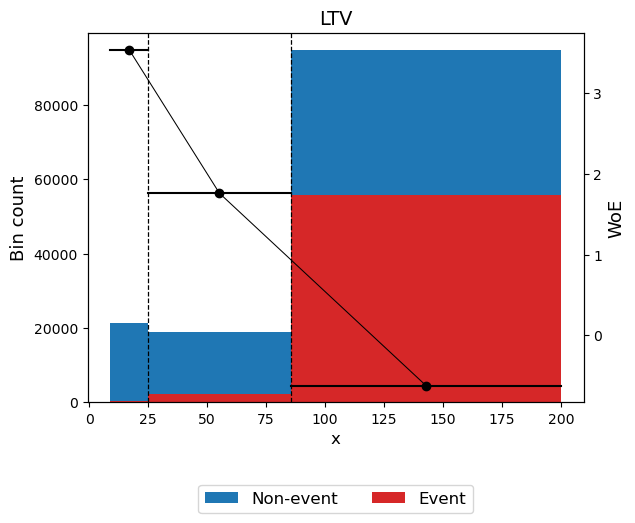


Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0868
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 245980.00)",22025,0.163513,9761,12264,0.556822,-0.499215,0.041284,5.107531e-03
1,"[245980.00, 405379.50)",26608,0.197537,13797,12811,0.481472,-0.196795,0.007728,9.644102e-04
2,"[405379.50, 560249.50)",25893,0.192229,14660,11233,0.433824,-0.004675,0.000004,5.253929e-07
3,"[560249.50, 805123.00)",35805,0.265815,22151,13654,0.381343,0.212908,0.011835,1.476590e-03
4,"[805123.00, inf)",24368,0.180907,16049,8319,0.341390,0.386162,0.025980,3.227427e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.086830,1.077648e-02


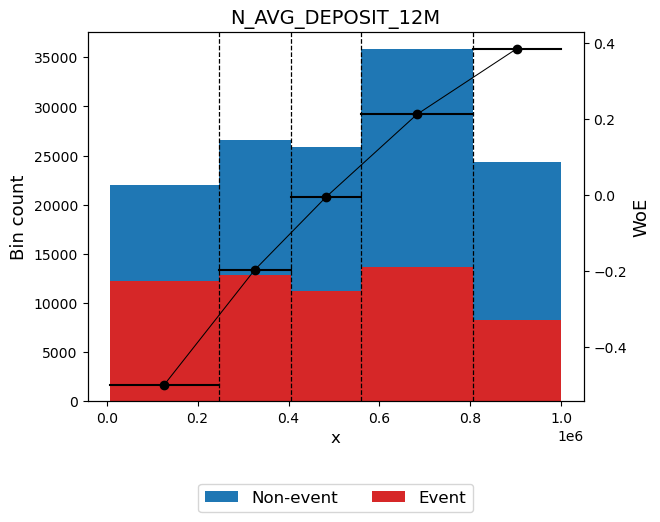


Processing: N_AVG_DEPOSIT_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0868
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 245980.00)",22025,0.163513,9761,12264,0.556822,-0.499215,0.041284,5.107531e-03
1,"[245980.00, 405379.50)",26608,0.197537,13797,12811,0.481472,-0.196795,0.007728,9.644102e-04
2,"[405379.50, 560249.50)",25893,0.192229,14660,11233,0.433824,-0.004675,0.000004,5.253929e-07
3,"[560249.50, 805123.00)",35805,0.265815,22151,13654,0.381343,0.212908,0.011835,1.476590e-03
4,"[805123.00, inf)",24368,0.180907,16049,8319,0.341390,0.386162,0.025980,3.227427e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.086830,1.077648e-02


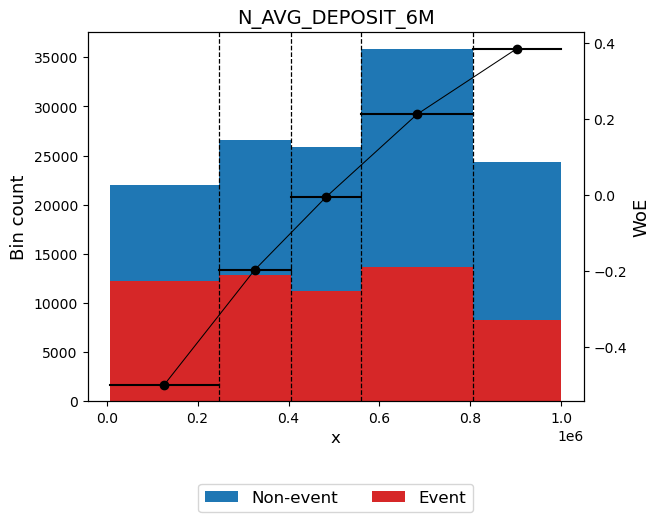


Processing: N_AVG_DD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0868
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 49196.00)",22025,0.163513,9761,12264,0.556822,-0.499215,0.041284,5.107531e-03
1,"[49196.00, 81075.50)",26608,0.197537,13797,12811,0.481472,-0.196795,0.007728,9.644102e-04
2,"[81075.50, 112049.50)",25893,0.192229,14660,11233,0.433824,-0.004675,0.000004,5.253929e-07
3,"[112049.50, 161003.50)",35786,0.265674,22139,13647,0.381350,0.212879,0.011826,1.475409e-03
4,"[161003.50, inf)",24387,0.181048,16061,8326,0.341411,0.386069,0.025988,3.228425e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.086829,1.077630e-02


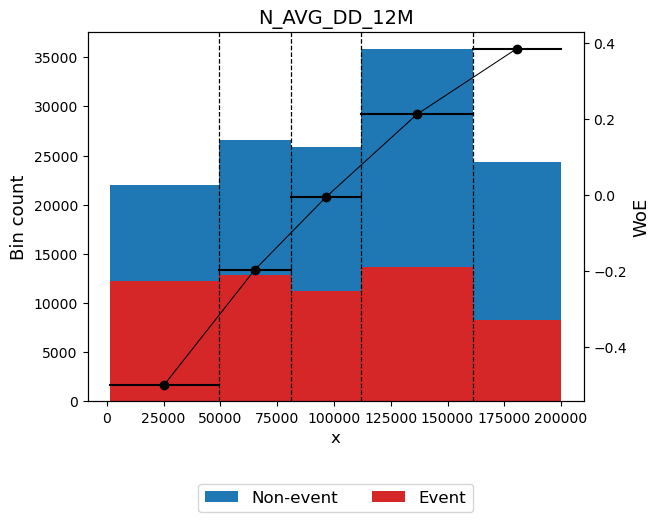


Processing: N_AVG_CD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0868
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 196784.00)",22025,0.163513,9761,12264,0.556822,-0.499215,0.041284,5.107531e-03
1,"[196784.00, 324304.00)",26608,0.197537,13797,12811,0.481472,-0.196795,0.007728,9.644102e-04
2,"[324304.00, 448200.00)",25893,0.192229,14660,11233,0.433824,-0.004675,0.000004,5.253929e-07
3,"[448200.00, 644099.00)",35805,0.265815,22151,13654,0.381343,0.212908,0.011835,1.476590e-03
4,"[644099.00, inf)",24368,0.180907,16049,8319,0.341390,0.386162,0.025980,3.227427e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.086830,1.077648e-02


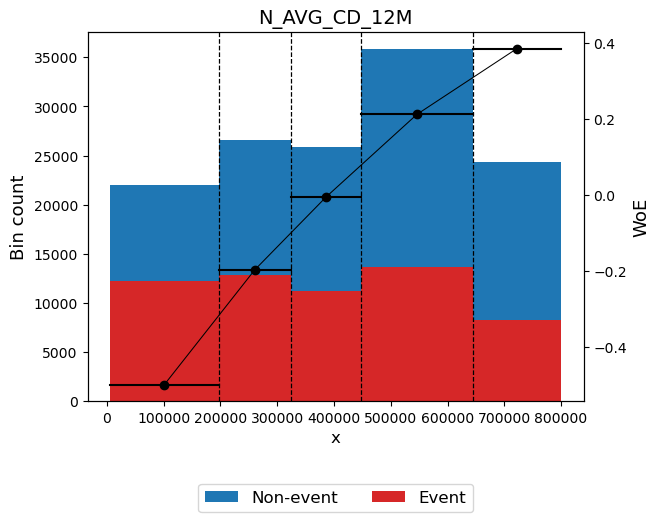


Processing: FLAG_SALARY_ACC
   -> STATUS: OPTIMAL
   -> IV: 0.0162
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",21975,0.163142,10905,11070,0.503754,-0.285959,0.013509,0.001683
1,"[0.50, inf)",112724,0.836858,65513,47211,0.418819,0.05668,0.002678,0.000335
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.016186,0.002018


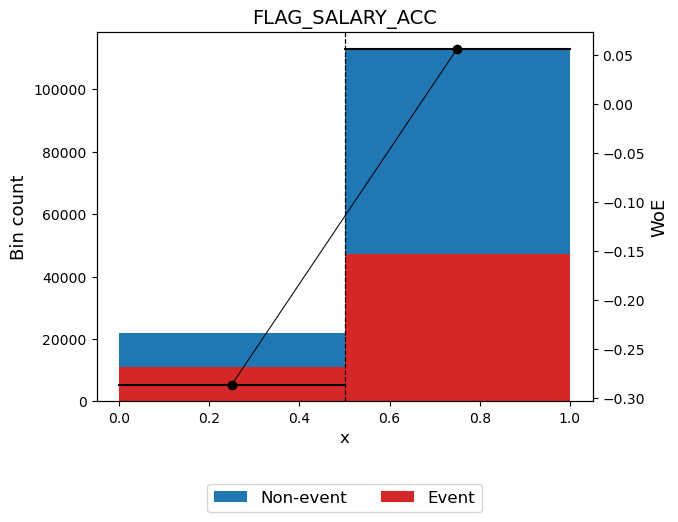


Processing: UTILIZATION_RATE
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[5, 0](0..1), coeff=13301, offset=0), IntAffine(expr=x[5, 1](0..1), coeff=5345, offset=0), IntAffine(expr=x[5, 2](0..1), coeff=2965, offset=0), IntAffine(expr=x[5, 3](0..1), coeff=760, offset=0), IntAffine(expr=x[5, 4](0..1), coeff=333, offset=0)), IntConstant(0)

Processing: CNT_CREDIT_CARDS
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntConstant(0), IntConstant(0)), IntConstant(0)

Processing: AMT_CASH_ADVANCE_12

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 72100288.00)",110279,0.818707,64401,45878,0.416018,0.068201,0.003789,0.000474
1,"[72100288.00, inf)",24420,0.181293,12017,12403,0.507903,-0.302558,0.016810,0.002093
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.020599,0.002567


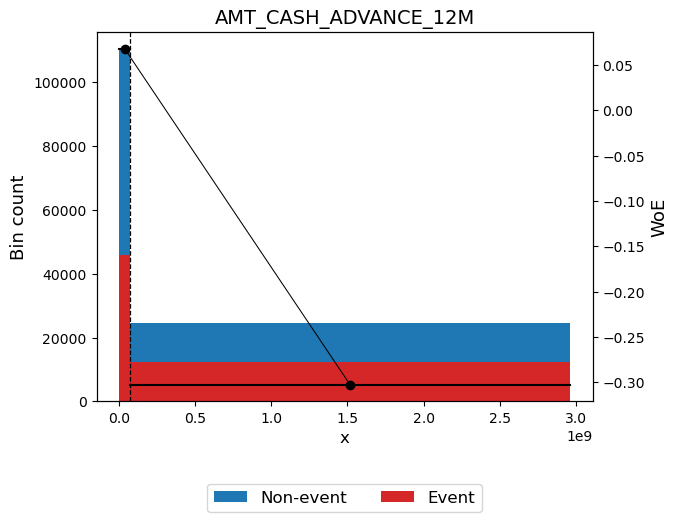


Processing: FLAG_CASH_ADVANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0205
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",109550,0.813295,64002,45548,0.415774,0.069205,0.003876,0.000484
1,"[0.50, inf)",25149,0.186705,12416,12733,0.506302,-0.296153,0.016585,0.002066
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.020461,0.002550


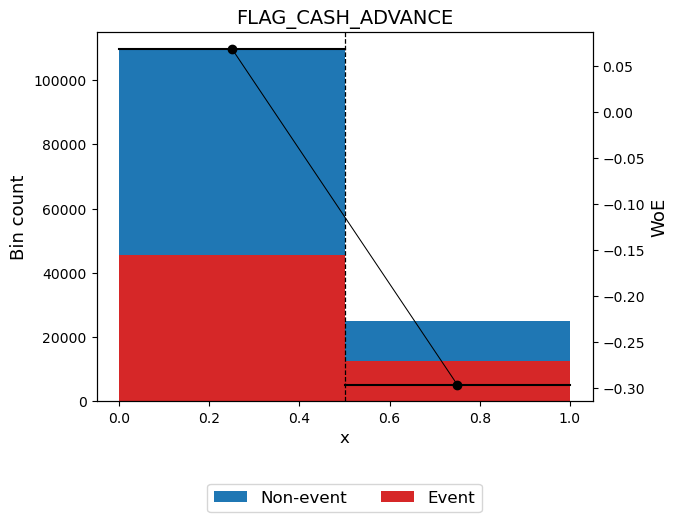


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0281
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.74)",26164,0.194240,13355,12809,0.489566,-0.229199,0.010318,0.001287
1,"[0.74, 0.93)",24632,0.182867,13311,11321,0.459605,-0.109011,0.002187,0.000273
2,"[0.93, 1.15)",33280,0.247069,18804,14476,0.434976,-0.009365,0.000022,0.000003
3,"[1.15, 1.40)",30559,0.226869,18127,12432,0.406820,0.106187,0.002538,0.000317
4,"[1.40, inf)",20064,0.148954,12821,7243,0.360995,0.300107,0.013054,0.001626
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.028118,0.003506


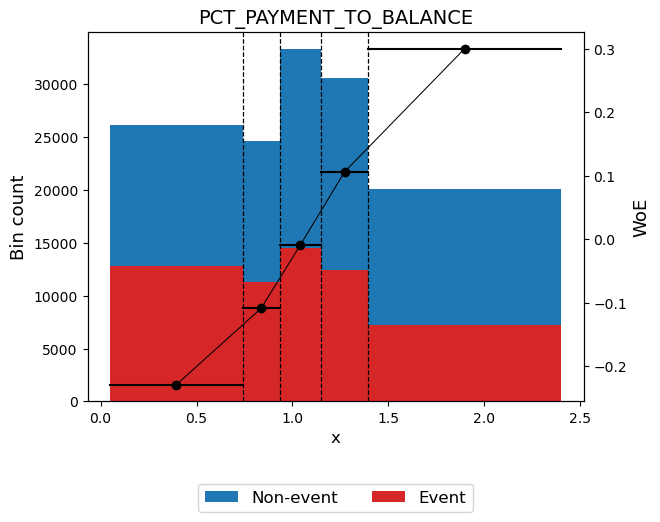


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0696
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",78614,0.583627,48790,29824,0.379373,0.22127,0.028043,0.003498
1,"[0.50, 1.50)",20724,0.153854,10772,9952,0.480216,-0.191765,0.005714,0.000713
2,"[1.50, 2.50)",14196,0.105391,6959,7237,0.509791,-0.310113,0.010268,0.001278
3,"[2.50, inf)",21165,0.157128,9897,11268,0.532388,-0.400677,0.025574,0.003176
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.069599,0.008665


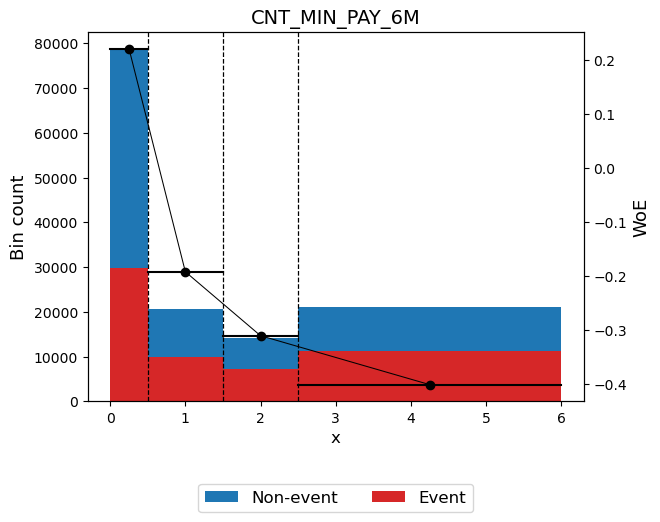


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.0622
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",80016,0.594036,49373,30643,0.382961,0.206057,0.024791,0.003093
1,"[0.50, 3.50)",28392,0.210781,14537,13855,0.487990,-0.222891,0.010587,0.001321
2,"[3.50, inf)",26291,0.195183,12508,13783,0.524248,-0.36801,0.026796,0.003331
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.062174,0.007745


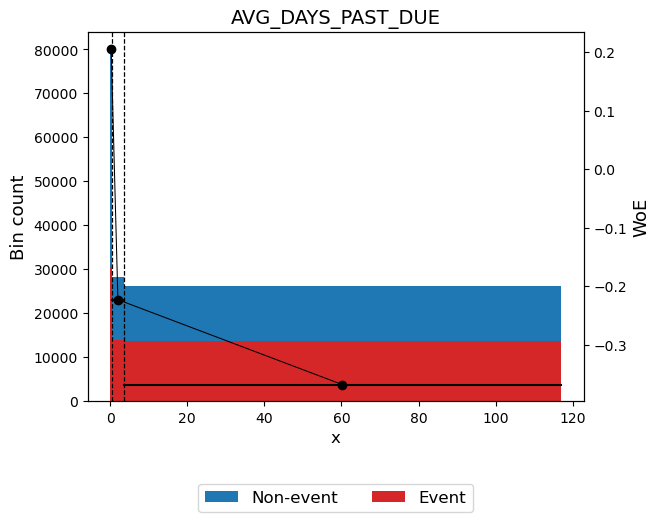


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.4380
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.72)",39455,0.292912,28828,10627,0.269345,0.727007,0.141694,0.017332
1,"[1.72, 1.89)",24191,0.179593,15829,8362,0.345666,0.367204,0.023376,0.002906
2,"[1.89, 2.16)",28133,0.208858,16028,12105,0.430278,0.009776,0.000020,0.000002
3,"[2.16, 2.49)",20852,0.154804,9726,11126,0.533570,-0.405424,0.025797,0.003203
4,"[2.49, inf)",22068,0.163832,6007,16061,0.727796,-1.254411,0.247083,0.029007
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.437970,0.052450


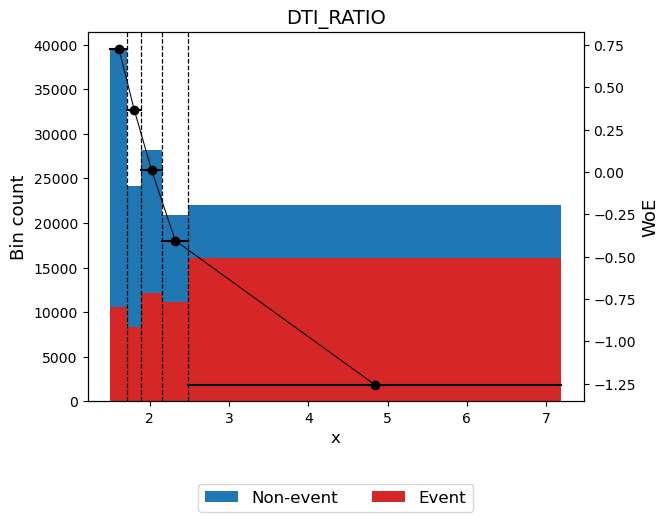


Processing: PTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.3204
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.00)",26393,0.195941,19833,6560,0.248551,0.835414,0.122785,0.014917
1,"[1.00, 1.13)",26273,0.195050,17863,8410,0.320100,0.482368,0.043149,0.005342
2,"[1.13, 1.26)",19443,0.144344,11568,7875,0.405030,0.113607,0.001847,0.000231
3,"[1.26, 1.49)",21840,0.162139,10852,10988,0.503114,-0.283397,0.013185,0.001643
4,"[1.49, inf)",40750,0.302526,16302,24448,0.599951,-0.676203,0.139405,0.017101
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.320371,0.039233


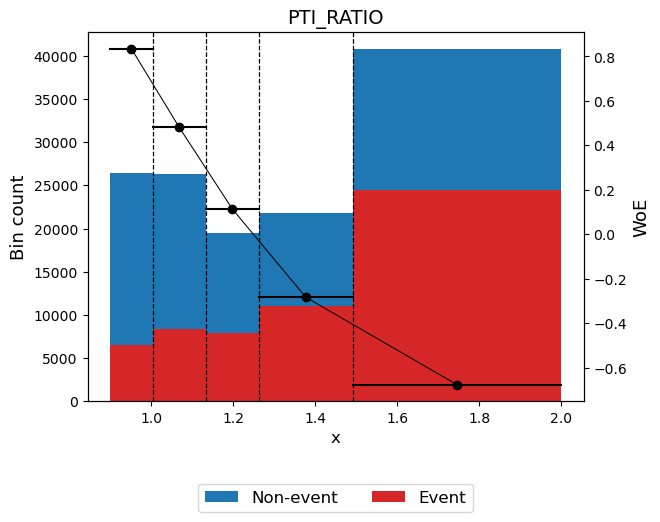


Processing: MOB
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[7, 0](0..1), coeff=16, offset=0), x[7, 1](0..1), IntAffine(expr=x[7, 2](0..1), coeff=-40, offset=0), IntAffine(expr=x[7, 3](0..1), coeff=14, offset=0), IntAffine(expr=x[7, 4](0..1), coeff=-53, offset=0), IntAffine(expr=x[7, 5](0..1), coeff=-13, offset=0), IntAffine(expr=x[7, 6](0..1), coeff=99, offset=0)), IntConstant(0)

Processing: CNT_OTHER_PRODUCTS
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",80987,0.601244,46012,34975,0.431859,0.003327,0.000007,8.314942e-07
1,"[0.50, 1.50)",33676,0.250009,19078,14598,0.433484,-0.003291,0.000003,3.385099e-07
2,"[1.50, inf)",20036,0.148746,11328,8708,0.434618,-0.007907,0.000009,1.162998e-06
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.000019,2.333003e-06


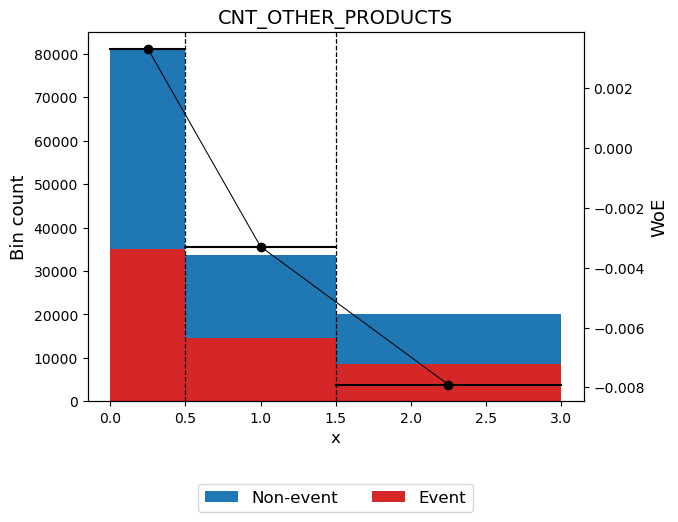


Processing: LIMIT_TO_INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.2632
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 29.97)",38833,0.288295,25664,13169,0.339119,0.396282,0.043543,0.005408
1,"[29.97, 34.75)",41311,0.306691,26252,15059,0.364528,0.284824,0.024252,0.003021
2,"[34.75, 36.90)",15490,0.114997,9382,6108,0.394319,0.158251,0.002844,0.000355
3,"[36.90, 42.11)",17413,0.129273,8344,9069,0.520818,-0.354261,0.016445,0.002045
4,"[42.11, inf)",21652,0.160744,6776,14876,0.687050,-1.057304,0.176121,0.021044
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.263205,0.031873


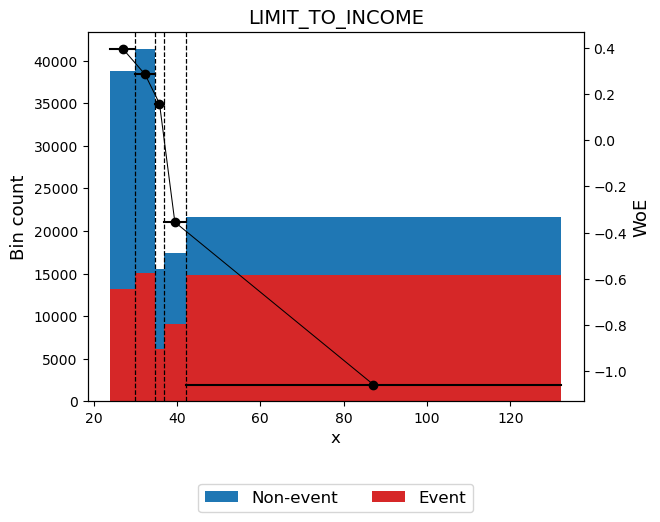


Processing: AMT_VAR_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.16)",28250,0.209727,15937,12313,0.435858,-0.012954,0.000035,0.000004
1,"[-0.16, inf)",106449,0.790273,60481,45968,0.431831,0.003442,0.000009,0.000001
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.000045,0.000006


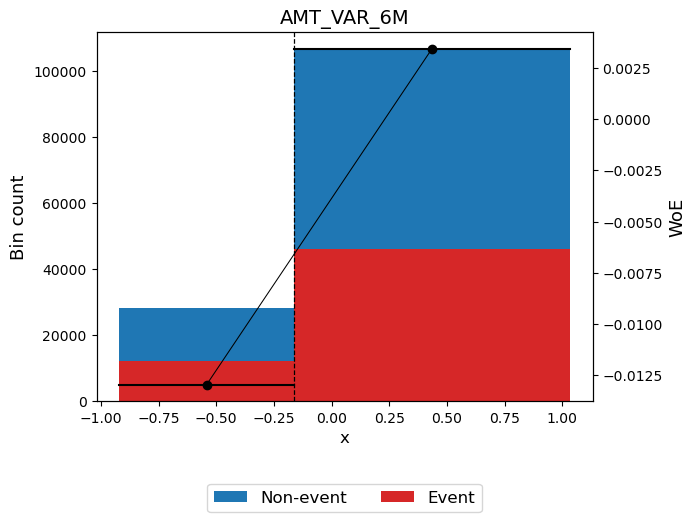


Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0173
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 95808124.00)",28327,0.210299,16694,11633,0.410668,0.090261,0.001702,0.000213
1,"[95808124.00, 281484656.00)",54097,0.401614,31532,22565,0.417121,0.063661,0.001620,0.000202
2,"[281484656.00, 353800432.00)",16893,0.125413,9796,7097,0.420115,0.05136,0.000330,0.000041
3,"[353800432.00, 444857392.00)",14751,0.109511,8197,6554,0.444309,-0.047249,0.000245,0.000031
4,"[444857392.00, inf)",20631,0.153164,10199,10432,0.505647,-0.29353,0.013365,0.001665
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.017262,0.002152


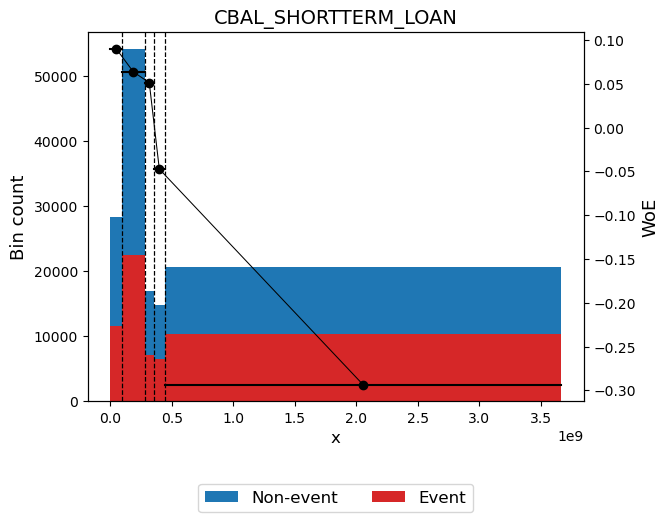


Processing: CBAL_LONGTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0203
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 195761264.00)",58042,0.430901,34097,23945,0.412546,0.082508,0.002916,0.000364
1,"[195761264.00, 247014832.00)",14978,0.111196,8714,6264,0.418213,0.05917,0.000388,0.000048
2,"[247014832.00, 366063568.00)",28667,0.212823,16638,12029,0.419611,0.053427,0.000605,0.000076
3,"[366063568.00, 490599520.00)",17278,0.128271,9460,7818,0.452483,-0.080299,0.000831,0.000104
4,"[490599520.00, inf)",15734,0.116809,7509,8225,0.522753,-0.362018,0.015518,0.001929
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.020257,0.002521


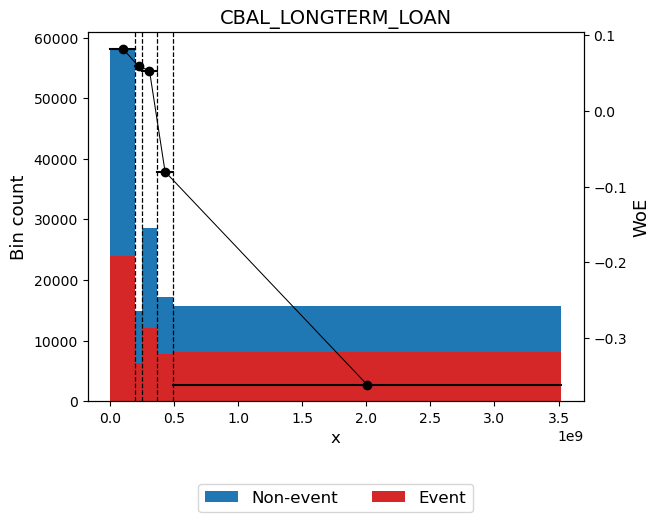


Processing: CNT_DPD_30PLUS_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0251
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",109157,0.810377,63990,45167,0.413780,0.077418,0.004829,0.000604
1,"[0.50, inf)",25542,0.189623,12428,13114,0.513429,-0.324671,0.020253,0.002521
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.025083,0.003124


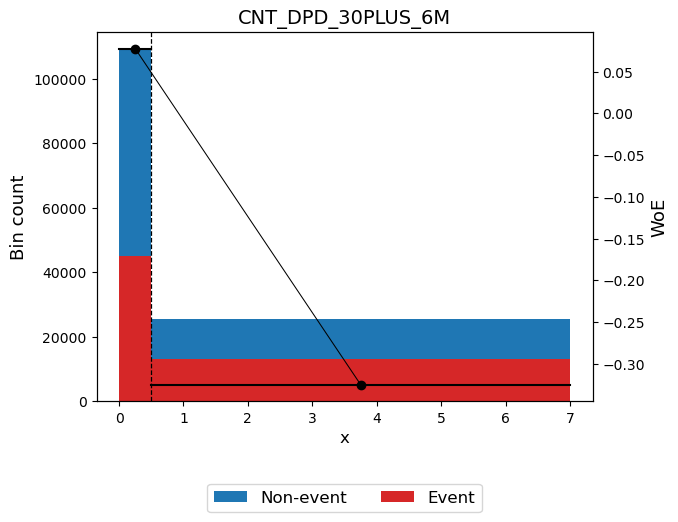


Processing: OCCUPATION_TYPE
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[4],13577,0.100795,7747,5830,0.429403,0.013347,0.000018,2.242266e-06
1,[2],40412,0.300017,22983,17429,0.431283,0.005677,0.000010,1.208248e-06
2,[3],27026,0.200640,15351,11675,0.431991,0.002789,0.000002,1.950043e-07
3,[1],53684,0.398548,30337,23347,0.434897,-0.009043,0.000033,4.075972e-06
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,134699,1.000000,76418,58281,0.432676,,0.000062,7.721490e-06


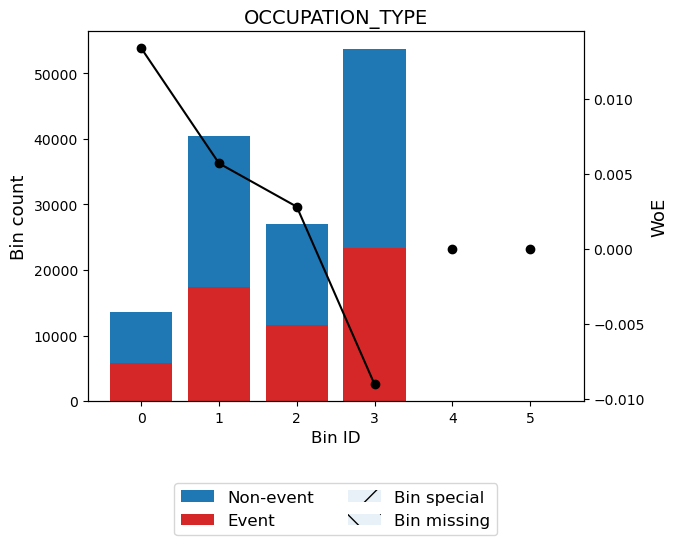


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 90.00)",81974,0.608572,46651,35323,0.430905,0.007218,0.000032,0.000004
1,"[90.00, inf)",52725,0.391428,29767,22958,0.435429,-0.011208,0.000049,0.000006
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.000081,0.000010


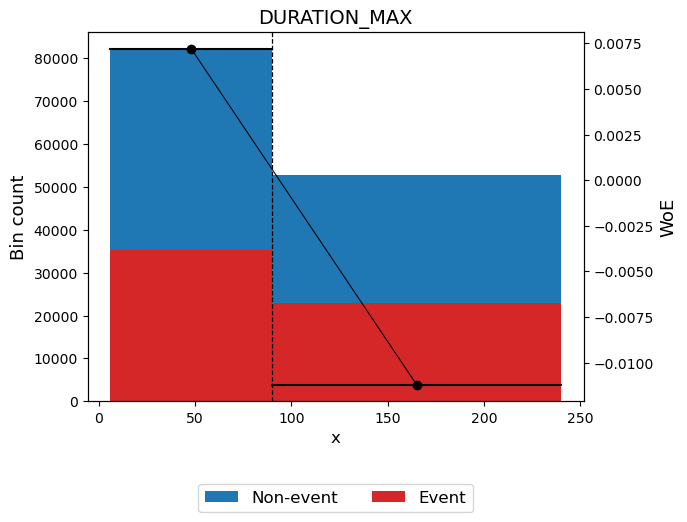


Processing: REMAINING_DURATION_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[2, 0](0..1), coeff=-18, offset=0), IntAffine(expr=x[2, 1](0..1), coeff=26, offset=0)), IntConstant(0)

Processing: TIME_TO_OP_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[5, 0](0..1), coeff=36, offset=0), IntAffine(expr=x[5, 1](0..1), coeff=2, offset=0), IntAffine(expr=x[5, 2](0..1), coeff=-2, offset=0), IntAffine(expr=x[5, 3](0..1), coeff=-10, offset=0), IntAffine(expr=x[5, 4](0..1), coe

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.99)",16493,0.122443,11245,5248,0.318196,0.491134,0.028046,0.003471
1,"[6.99, 8.38)",24040,0.178472,14972,9068,0.377205,0.230488,0.009296,0.001159
2,"[8.38, 10.07)",38719,0.287448,22235,16484,0.425734,0.028335,0.000230,0.000029
3,"[10.07, 12.06)",36203,0.268770,18868,17335,0.478828,-0.186202,0.009409,0.001174
4,"[12.06, inf)",19244,0.142867,9098,10146,0.527229,-0.379967,0.020910,0.002598
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.067892,0.008432


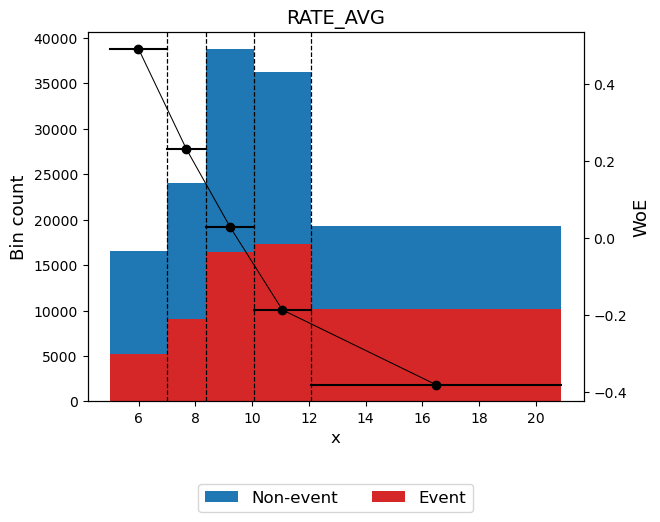


Processing: PURCOD_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[3, 2]",26902,0.199719,15371,11531,0.428630,0.016501,0.000054,0.000007
1,[1],27142,0.201501,15451,11691,0.430735,0.007912,0.000013,0.000002
2,"[6, 9]",80655,0.598780,45596,35059,0.434679,-0.008154,0.000040,0.000005
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.000107,0.000013


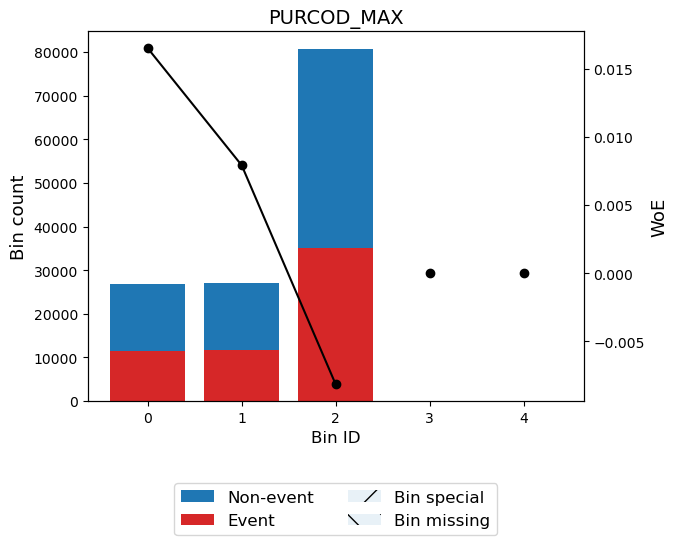


Processing: PURCOD_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[3, 2]",26902,0.199719,15371,11531,0.428630,0.016501,0.000054,0.000007
1,[1],27142,0.201501,15451,11691,0.430735,0.007912,0.000013,0.000002
2,"[6, 9]",80655,0.598780,45596,35059,0.434679,-0.008154,0.000040,0.000005
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.000107,0.000013


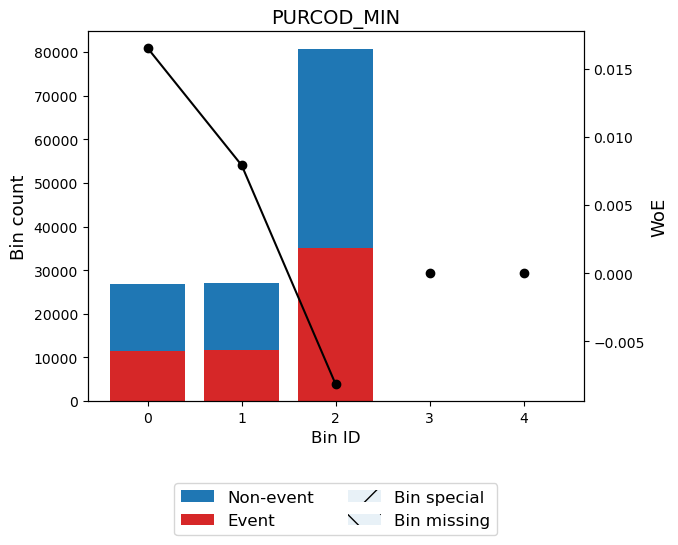


Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.9111
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",14560,0.108093,13240,1320,0.090659,2.034669,0.306439,0.032820
1,"[2.50, 7.50)",19106,0.141842,15272,3834,0.200670,1.11117,0.148967,0.017718
2,"[7.50, 16.50)",24815,0.184226,17112,7703,0.310417,0.527228,0.048376,0.005978
3,"[16.50, 30.50)",25796,0.191508,14965,10831,0.419871,0.05236,0.000523,0.000065
4,"[30.50, inf)",50422,0.374331,15829,34593,0.686070,-1.05275,0.406802,0.048625
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.911108,0.105207


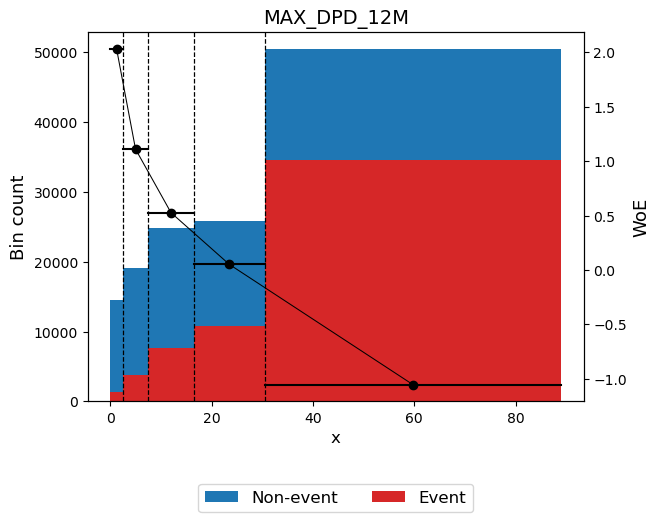


Processing: MAX_DPD_12M_OBS
   -> STATUS: OPTIMAL
   -> IV: 0.9111
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",14560,0.108093,13240,1320,0.090659,2.034669,0.306439,0.032820
1,"[2.50, 7.50)",19106,0.141842,15272,3834,0.200670,1.11117,0.148967,0.017718
2,"[7.50, 16.50)",24815,0.184226,17112,7703,0.310417,0.527228,0.048376,0.005978
3,"[16.50, 30.50)",25796,0.191508,14965,10831,0.419871,0.05236,0.000523,0.000065
4,"[30.50, inf)",50422,0.374331,15829,34593,0.686070,-1.05275,0.406802,0.048625
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.911108,0.105207


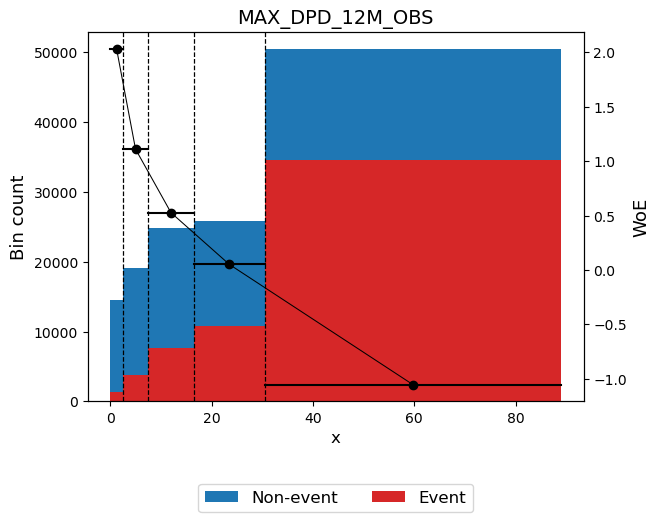


Processing: AVG_OD_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.7544
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",20797,0.154396,18312,2485,0.119488,1.726342,0.340074,0.037910
1,"[0.50, 2.50)",24982,0.185465,18392,6590,0.263790,0.75542,0.096394,0.011771
2,"[2.50, 5.50)",24932,0.185094,15168,9764,0.391625,0.169544,0.005248,0.000655
3,"[5.50, 10.50)",25944,0.192607,12261,13683,0.527405,-0.380673,0.028295,0.003516
4,"[10.50, inf)",38044,0.282437,12285,25759,0.677084,-1.011347,0.284410,0.034110
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.754422,0.087961


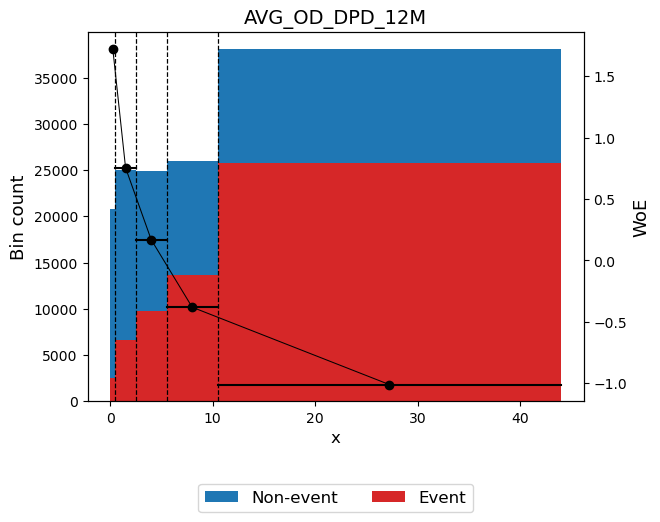


Processing: SUM_ALL_OD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.8207
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 5.50)",18082,0.134240,16182,1900,0.105077,1.871103,0.335219,0.036693
1,"[5.50, 17.50)",22586,0.167678,17210,5376,0.238024,0.892604,0.118686,0.014362
2,"[17.50, 43.50)",31716,0.235458,20007,11709,0.369183,0.264782,0.016126,0.002010
3,"[43.50, 70.50)",21017,0.156029,9994,11023,0.524480,-0.368941,0.021529,0.002676
4,"[70.50, inf)",41298,0.306595,13025,28273,0.684609,-1.045979,0.329139,0.039364
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.820700,0.095105


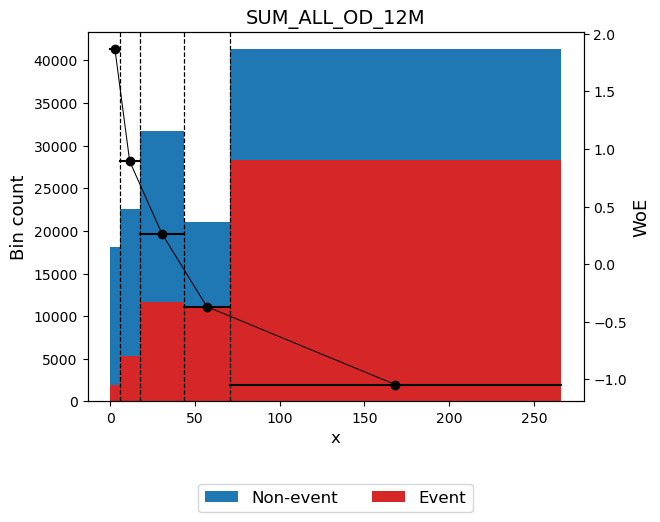


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0996
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 155206032.00)",19071,0.141582,13406,5665,0.297048,0.590453,0.046190,0.005691
1,"[155206032.00, 226012696.00)",44654,0.331510,26689,17965,0.402316,0.124884,0.005121,0.000640
2,"[226012696.00, 273503648.00)",26606,0.197522,15161,11445,0.430166,0.010231,0.000021,0.000003
3,"[273503648.00, 354794608.00)",23536,0.174730,11842,11694,0.496856,-0.258365,0.011803,0.001471
4,"[354794608.00, inf)",20832,0.154656,9320,11512,0.552611,-0.482169,0.036435,0.004511
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.099570,0.012316


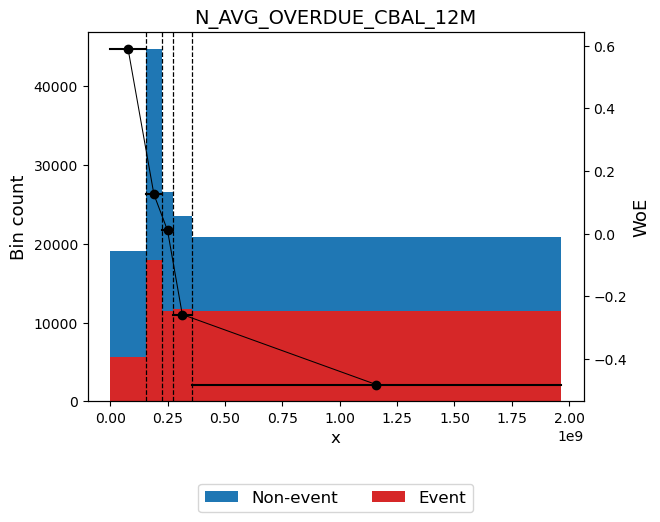


Processing: CBAL_TO_INC_12MON
   -> STATUS: OPTIMAL
   -> IV: 0.4380
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 20.62)",39455,0.292912,28828,10627,0.269345,0.727007,0.141694,0.017332
1,"[20.62, 22.66)",24191,0.179593,15829,8362,0.345666,0.367204,0.023376,0.002906
2,"[22.66, 25.89)",28133,0.208858,16028,12105,0.430278,0.009776,0.000020,0.000002
3,"[25.89, 29.83)",20852,0.154804,9726,11126,0.533570,-0.405424,0.025797,0.003203
4,"[29.83, inf)",22068,0.163832,6007,16061,0.727796,-1.254411,0.247083,0.029007
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.437970,0.052450


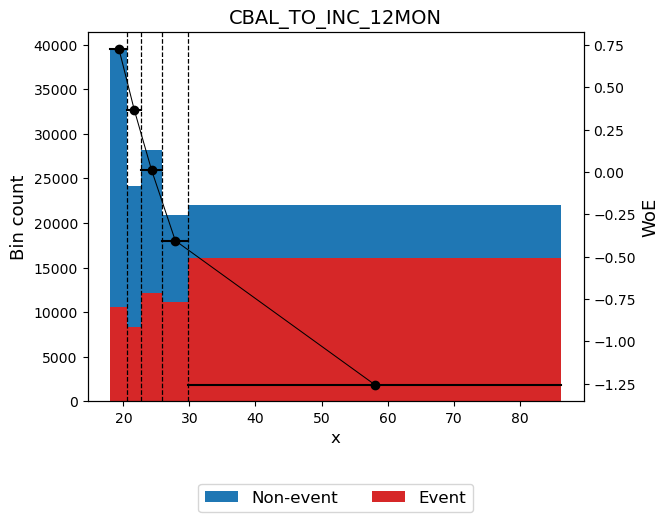


Processing: REAL_GDP_GROWTH_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0042
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.97)",69890,0.518861,38577,31313,0.448033,-0.062319,0.002023,0.000253
1,"[4.97, inf)",64809,0.481139,37841,26968,0.416115,0.0678,0.002201,0.000275
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,134699,1.000000,76418,58281,0.432676,,0.004224,0.000528


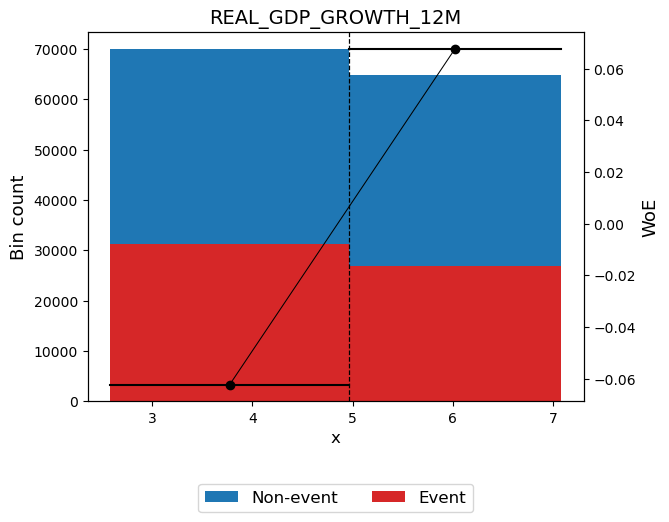

In [4]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", "PURCOD_MIN",
    "OCCUPATION_TYPE", "TRINHDO", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", "SOCIF", "year",
    "bad_current", "CASE_ID", target_col,
    "SNAPSHOT_DATE", "CURE_DATE"
]


candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="cp",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [5]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 47


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,LTV,1.5322,Tăng (Thuận),13.98%,100.00%,4,PASS
1,COLLATERAL_VALUE,1.3093,Giảm (Nghịch),13.94%,100.00%,5,PASS
2,SOHUUNHA,1.3078,Giảm (Nghịch),29.95%,100.00%,3,PASS
3,MAX_DPD_12M,0.9111,Tăng (Thuận),10.81%,100.00%,6,PASS
4,MAX_DPD_12M_OBS,0.9111,Tăng (Thuận),10.81%,100.00%,6,PASS
5,SUM_ALL_OD_12M,0.8207,Tăng (Thuận),13.42%,100.00%,6,PASS
6,AVG_OD_DPD_12M,0.7544,Tăng (Thuận),15.44%,100.00%,6,PASS
7,CBAL_TO_INC_12MON,0.4380,Tăng (Thuận),15.48%,100.00%,6,PASS
8,DTI_RATIO,0.4380,Tăng (Thuận),15.48%,100.00%,6,PASS
9,PTI_RATIO,0.3204,Tăng (Thuận),14.43%,100.00%,6,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [6]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 12 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['INCOME', 'CBAL_SHORTTERM_LOAN', 'FLAG_SALARY_ACC', 'REAL_GDP_GROWTH_12M', 'PURCOD_MIN', 'PURCOD_MAX', 'DURATION_MAX', 'OCCUPATION_TYPE', 'AMT_VAR_6M', 'CNT_OTHER_PRODUCTS', 'C_GIOITINH', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 35


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...
  -> Đã đưa biến 'DTI_RATIO' lên vị trí ưu tiên số 1.
  -> Đang tính toán WoE cho 35 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 35
Số biến giữ lại:   15
Số biến bị loại:   20

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,COLLATERAL_VALUE,1.3093,Corr với LTV (r=0.93)
1,SOHUUNHA,1.3078,Corr với LTV (r=0.95)
2,MAX_DPD_12M_OBS,0.9111,Corr với MAX_DPD_12M (r=1.00)
3,SUM_ALL_OD_12M,0.8207,Corr với MAX_DPD_12M (r=0.93)
4,AVG_OD_DPD_12M,0.7544,Corr với MAX_DPD_12M (r=0.90)
5,CBAL_TO_INC_12MON,0.4380,Corr với DTI_RATIO (r=1.00)
6,PTI_RATIO,0.3204,Corr với DTI_RATIO (r=0.75)
7,LIMIT_TO_INCOME,0.2632,Corr với DTI_RATIO (r=0.78)
8,N_AVG_DEPOSIT_6M,0.0868,Corr với N_AVG_DEPOSIT_12M (r=1.00)
9,N_AVG_CD_12M,0.0868,Corr với N_AVG_DEPOSIT_12M (r=1.00)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,LTV,1.5322,13.98%,100.00%
1,MAX_DPD_12M,0.9111,10.81%,100.00%
2,DTI_RATIO,0.4380,15.48%,100.00%
3,TUOI,0.1699,16.03%,100.00%
4,N_AVG_OVERDUE_CBAL_12M,0.0996,14.16%,100.00%
5,N_AVG_DEPOSIT_12M,0.0868,16.35%,100.00%
6,CNT_MIN_PAY_6M,0.0696,10.54%,100.00%
7,RATE_AVG,0.0679,12.24%,100.00%
8,AVG_DAYS_PAST_DUE,0.0622,19.52%,100.00%
9,TTHONNHAN,0.0402,35.13%,100.00%


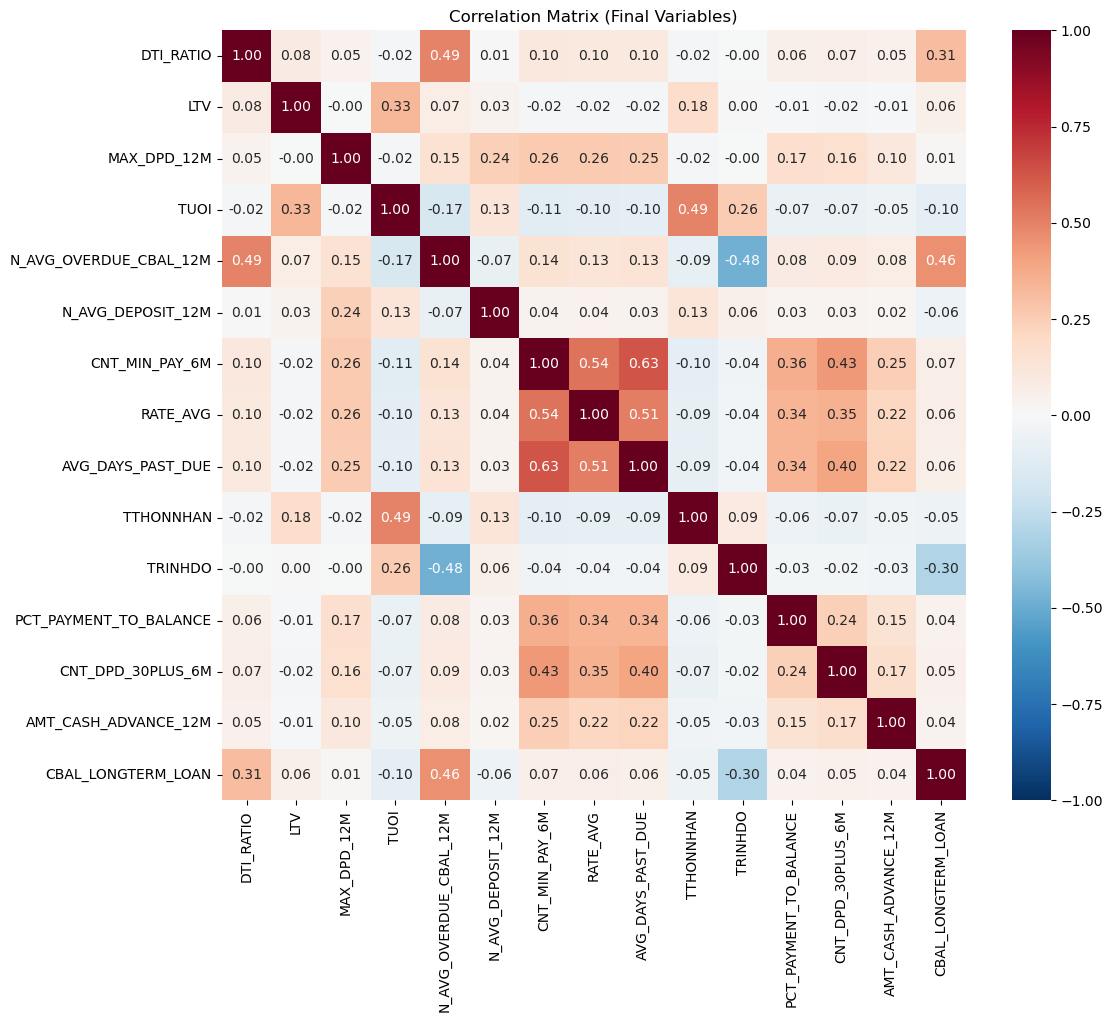

In [7]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- LOGIC ƯU TIÊN: ĐƯA DTI_RATIO LÊN ĐẦU ---
priority_var = "DTI_RATIO"
if priority_var in sorted_features:
    sorted_features.remove(priority_var)
    sorted_features.insert(0, priority_var)
    print(f"  -> Đã đưa biến '{priority_var}' lên vị trí ưu tiên số 1.")
else:
    print(f"  -> Cảnh báo: '{priority_var}' không nằm trong danh sách biến (có thể đã bị loại vì IV quá thấp).")

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

LASSO REGRESSION 

In [8]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 15      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

# 1. Chuẩn bị dữ liệu WoE (Chạy ngầm)
X_woe_lasso = pd.DataFrame()
for feature in kept_vars:
    try:
        optb = binning_results[feature]
        x_raw = train[feature].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else train[feature]
        X_woe_lasso[feature] = optb.transform(x_raw, metric="woe")
    except: pass

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_woe_lasso)
y = train[TARGET_COL]

# 2. Ranking biến (Chạy 1 lần duy nhất)
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
lr.fit(X_scaled, y)
coefs_abs = np.abs(lr.coef_[0])

# 3. Lấy Top biến
df_imp = pd.DataFrame({'Variable': kept_vars, 'Imp': coefs_abs}).sort_values('Imp', ascending=False)
final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

# Đảm bảo DTI (Force keep)
if "DTI_RATIO" in kept_vars and "DTI_RATIO" not in final_vars_lasso:
    final_vars_lasso.pop()
    final_vars_lasso.append("DTI_RATIO")

kept_vars = final_vars_lasso # Cập nhật biến toàn cục
print(f"  -> Đã xong. Danh sách {len(kept_vars)} biến được chọn: {kept_vars}")


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> Đã xong. Danh sách 15 biến được chọn: ['LTV', 'MAX_DPD_12M', 'DTI_RATIO', 'TUOI', 'TRINHDO', 'AMT_CASH_ADVANCE_12M', 'N_AVG_OVERDUE_CBAL_12M', 'N_AVG_DEPOSIT_12M', 'TTHONNHAN', 'CBAL_LONGTERM_LOAN', 'CNT_MIN_PAY_6M', 'PCT_PAYMENT_TO_BALANCE', 'CNT_DPD_30PLUS_6M', 'AVG_DAYS_PAST_DUE', 'RATE_AVG']


In [9]:
# ============================================================
# BƯỚC 6: CHUẨN BỊ DỮ LIỆU FINAL (TRANSFORM ALL)
# ============================================================
print(f"\n[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...")

def transform_woe_silent(df, cols, binning_dict):
    out = pd.DataFrame()
    for c in cols:
        optb = binning_dict[c]
        x = df[c].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df[c]
        out[c] = optb.transform(x, metric="woe")
    return out

X_train_final = transform_woe_silent(train, kept_vars, binning_results)
X_oos_final   = transform_woe_silent(oos, kept_vars, binning_results)
X_oot_final   = transform_woe_silent(oot, kept_vars, binning_results)
y_train_full  = train[TARGET_COL]

# Tính sẵn Std Dev để tính Weight
std_devs = X_train_final.std()
print("  -> Đã chuẩn bị xong dữ liệu.")


[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...
  -> Đã chuẩn bị xong dữ liệu.


In [10]:
# ============================================================
# BƯỚC 7: VÉT CẠN TỔ HỢP (BRUTE-FORCE OPTIMIZED)
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    X_sub = X_data[vars_names]
    
    # Fit
    clf = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
    clf.fit(X_sub, y_data)
    coefs = clf.coef_[0]
    
    # Check 1: Dấu
    if np.any(coefs >= 0): return None
    
    # Check 2: Weight (3% - 35%)
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0: return None
    w = (imp / total) * 100
    if np.any(w < 3) or np.any(w > 35): return None
    
    # Check 3: Gini > 50%
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.5: return None
    
    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []
for k in range(BRUTE_FORCE_K_MIN, min(BRUTE_FORCE_K_MAX, len(kept_vars)) + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song (verbose=1: Chỉ hiện progress bar gọn gàng)
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_final, y_train_full, std_devs) for c in combos
)

valid_models = [r for r in results if r is not None]
print(f"  -> Hoàn tất! Tìm thấy {len(valid_models)} mô hình đạt chuẩn.")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 15 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 16384
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    6.4s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   21.9s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:   45.3s
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  1.3min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  1.9min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed:  2.7min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed:  3.6min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed:  4.6min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed:  5.7min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed:  6.9min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed:  8.0min
[Parallel(n_jobs=15)]: Done 7170 tasks      | elapsed:  9.7min
[Parallel(n_jobs=15)]: Done 8420 tasks      | elapsed: 11.6min
[Parallel(n_jobs=15)]: Done 9770 tasks      | elapsed: 13.6min
[Parallel(n_jobs=15)]: Done 11220 tasks      

  -> Hoàn tất! Tìm thấy 0 mô hình đạt chuẩn.


[Parallel(n_jobs=15)]: Done 16384 out of 16384 | elapsed: 24.4min finished


In [13]:
results

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [11]:
# ============================================================
# BƯỚC 8: CHỌN MÔ HÌNH TỐT NHẤT & VALIDATE
# ============================================================
if valid_models:
    # Convert to DF & Sort
    df_res = pd.DataFrame(valid_models, columns=['Num_Vars', 'Vars', 'Coefs', 'Weights', 'Gini_Train'])
    df_res = df_res.sort_values('Gini_Train', ascending=False).reset_index(drop=True)
    
    # Lấy Best Model (Rank 1)
    best_row = df_res.iloc[0]
    best_vars = best_row['Vars']
    
    print(f"\n[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top {len(valid_models)})")
    print("-" * 60)
    print(f"Danh sách biến ({len(best_vars)}): {best_vars}")
    
    # Validate OOS/OOT
    def get_gini(X, y, model_cols, model_obj):
        # Lưu ý: model_obj là Logit của statsmodels nên cần add_constant
        X_new = sm.add_constant(X[model_cols])
        pred = model_obj.predict(X_new)
        return 2 * roc_auc_score(y, pred) - 1

    # Fit lại bằng Statsmodels để ra report đẹp
    X_train_best = sm.add_constant(X_train_final[best_vars])
    final_logit = sm.Logit(y_train_full, X_train_best).fit(disp=0)
    
    # Tính Gini các tập
    g_train = 2 * roc_auc_score(y_train_full, final_logit.predict(X_train_best)) - 1
    
    X_oos_best = sm.add_constant(X_oos_final[best_vars])
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], final_logit.predict(X_oos_best)) - 1
    
    X_oot_best = sm.add_constant(X_oot_final[best_vars])
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], final_logit.predict(X_oot_best)) - 1
    
    # In bảng kết quả gọn đẹp
    print("-" * 60)
    print(f"{'METRIC':<10} | {'VALUE':<10} | {'NOTES'}")
    print("-" * 60)
    print(f"{'Gini Train':<10} | {g_train:.2%}    |")
    print(f"{'Gini OOS':<10} | {g_oos:.2%}    | Diff: {g_train - g_oos:.2%}")
    print(f"{'Gini OOT':<10} | {g_oot:.2%}    | Diff: {g_train - g_oot:.2%}")
    print("-" * 60)
    
    if (g_train - g_oos > 0.1) or (g_train - g_oot > 0.1):
        print("⚠️ CẢNH BÁO: Có dấu hiệu Overfitting!")
    else:
        print("✅ KẾT QUẢ TỐT: Mô hình ổn định.")

    # In bảng hệ số và trọng số
    print("\n>>> CHI TIẾT BIẾN & TRỌNG SỐ:")
    res_detail = pd.DataFrame({
        'Variable': best_vars,
        'Coef': final_logit.params.drop('const').values,
        'P-value': final_logit.pvalues.drop('const').values,
        'Weight(%)': best_row['Weights']
    }).sort_values('Weight(%)', ascending=False)
    
    display(res_detail.style.format({
        'Coef': '{:.4f}', 'P-value': '{:.4f}', 'Weight(%)': '{:.2f}'
    }))
    
else:
    print("❌ Không tìm thấy mô hình nào thỏa mãn tiêu chí.")

❌ Không tìm thấy mô hình nào thỏa mãn tiêu chí.


In [12]:
# ============================================================
# BƯỚC CUỐI (SỬA ĐỔI): Tự tạo ID nếu không có CASE_ID
# ============================================================

# 1. Reset index để lấy Index làm ID (đặt tên là CASE_ID cho thống nhất)
train_reset = train.reset_index().rename(columns={'index': 'CASE_ID'})
oos_reset   = oos.reset_index().rename(columns={'index': 'CASE_ID'})
oot_reset   = oot.reset_index().rename(columns={'index': 'CASE_ID'})

# Đánh dấu nguồn (để sau này tính Gini riêng)
train_reset['DATA_TYPE'] = 'TRAIN'
oos_reset['DATA_TYPE']   = 'OOS'
oot_reset['DATA_TYPE']   = 'OOT'

# 2. Chọn biến ID thực tế (Nếu bạn có SOCIF thì dùng SOCIF, không thì dùng cái CASE_ID vừa tạo)
ID_COL = "SOCIF" if "SOCIF" in train.columns else "CASE_ID"

# 3. Gộp dữ liệu
# Lưu ý: Thêm DATA_TYPE vào export để sau này tính Gini riêng từng tập
needed_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL] + best_vars
df_full_seg = pd.concat([
    train_reset[needed_cols] if ID_COL == "CASE_ID" else train[needed_cols], 
    oos_reset[needed_cols] if ID_COL == "CASE_ID" else oos[needed_cols], 
    oot_reset[needed_cols] if ID_COL == "CASE_ID" else oot[needed_cols]
], axis=0).reset_index(drop=True)

# 4. Transform & Predict (Giữ nguyên)
X_woe_full = pd.DataFrame()
for col in best_vars:
    optb = binning_results[col]
    x_raw = df_full_seg[col].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df_full_seg[col]
    X_woe_full[col] = optb.transform(x_raw, metric="woe")

X_final = sm.add_constant(X_woe_full)
df_full_seg['PREDICTED_PROB'] = final_logit.predict(X_final)

# 5. Xuất file (QUAN TRỌNG: Đã thêm cột DATA_TYPE)
# Xuất thêm DATA_TYPE để tí nữa gộp 3 file lại vẫn biết đâu là Train/OOS/OOT
output_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL, "PREDICTED_PROB"]
output_filename = f"RESULT_{3}.csv"

df_full_seg[output_cols].to_csv(output_filename, index=False)
print(f"-> Đã xuất file (kèm DATA_TYPE): {output_filename}")

NameError: name 'best_vars' is not defined

In [ ]:
df_res.to_csv("topmodel3.csv")